# Regression on Chinese data 
- 2016 data 
- Populated estimated from all china's gdp per capita

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import copy

# import custom functions in myFunctions.ipynb
import ipynb.fs.defs.myFunctions as myFun

In [3]:
china = pd.read_pickle("Data/china_gnc_gdp_pop2016_est_pop_from_gdp")

In [4]:
china.head()

,city_gnc,city_all_china,province,gncAbs,gncRel,pop_est,gdp_yuan
0,Beijing,Beijing,Beijing,78592.0,69.178836,2.171705e+07,2.704120e+12
1,Shanghai,Shanghai,Shanghai,76066.0,66.955381,2.417494e+07,2.988700e+12
2,Guangzhou,Guangzhou,Guangdong province,49163.0,43.274622,1.377230e+07,1.954744e+12
3,Shenzhen,Shenzhen,Guangdong province,36555.0,32.176714,1.164356e+07,1.949260e+12
4,Chengdu,Chengdu,Sichuan province,32097.0,28.252660,1.581371e+07,1.217023e+12


## A. Build OLS models

In [5]:
china = myFun.clean_data(china, ["gdp_yuan"])

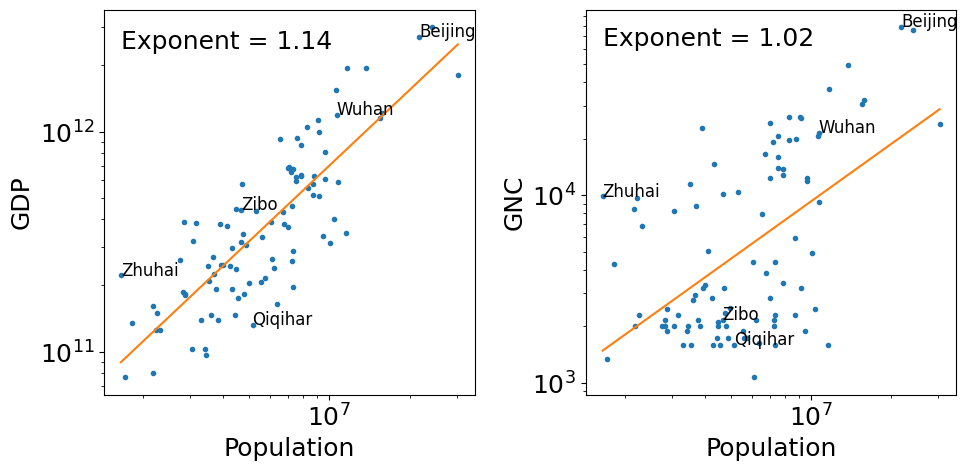

In [6]:
selected_cities = ["Beijing", "Wuhan", "Qiqihar", "Zibo", "Zhuhai"]

out = myFun.plot_descriptives(china, "pop_est", "gdp_yuan", "gncAbs", "city_gnc", selected_cities, "Population", "GDP", "GNC", ".")

In [7]:
stats.pearsonr(np.log(china.pop_est), np.log(china.gncAbs))


PearsonRResult(statistic=0.5373235113923662, pvalue=1.9754042198983858e-08)

## Run various regression models

In [8]:
outChina1 = myFun.run_null_model(china, "pop_est", "gdp_yuan")
outChina1

{'params': const      8.840446
 pop_est    1.143698
 dtype: float64,
 'aic': 122.98026319251727,
 'bic': 128.08801697571835,
 'CI95':                 0          1
 const    6.317585  11.363306
 pop_est  0.981477   1.305919,
 'r_sq': 0.6782130375329799,
 'r_sq_adj': 0.6747529626677431,
 'standar_err': const      1.270449
 pop_est    0.081690
 dtype: float64}

In [9]:
outChina2 = myFun.run_gnc_model(china, "pop_est", "gncAbs", "gdp_yuan")
outChina2

{'params': const      11.211071
 pop_est     0.812059
 gncAbs      0.325700
 dtype: float64,
 'aic': 70.47345096536009,
 'bic': 78.1350816401617,
 'CI95':                 0          1
 const    9.226900  13.195242
 pop_est  0.666879   0.957238
 gncAbs   0.249088   0.402311,
 'r_sq': 0.818703502065925,
 'r_sq_adj': 0.8147622738499669,
 'standar_err': const      0.999035
 pop_est    0.073098
 gncAbs     0.038574
 dtype: float64}